In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("blinkit_marketing_performance.csv")
df

campaign_id          campaign_name        date target_audience  \
0          548299      New User Discount  2024-11-05         Premium   
1          390914        Weekend Special  2024-11-05        Inactive   
2          834385         Festival Offer  2024-11-05        Inactive   
3          241523             Flash Sale  2024-11-05        Inactive   
4          595111       Membership Drive  2024-11-05       New Users   
...           ...                    ...         ...             ...   
5395       381623       Membership Drive  2023-03-17       New Users   
5396       493317     Category Promotion  2023-03-17         Premium   
5397       879292  App Push Notification  2023-03-17             All   
5398       461129         Email Campaign  2023-03-17       New Users   
5399       282514       Referral Program  2023-03-17       New Users   

           channel  impressions  clicks  conversions    spend  \
0              App         3130     163           78  1431.85   
1              App         3925     494           45  4506.34   
2            Email         7012     370           78  4524.23   
3              SMS         1115     579           86  3622.79   
4            Email         7172     795           54  2888.99   
...            ...          ...     ...          ...      ...   
5395         Email         8331     809           92  2363.07   
5396  Social Media         5216     860           34  3922.53   
5397           App         8480     734           20  1990.75   
5398         Email         3569     568           10  4246.47   
5399  Social Media         5967     439           78  1511.93   

      revenue_generated  roas  
0               4777.75  3.60  
1               6238.11  2.98  
2               2621.00  2.95  
3               2955.00  2.84  
4               8951.81  2.22  
...                 ...   ...  
5395            3710.79  1.64  
5396            7701.25  2.01  
5397            6650.41  3.98  
5398            5880.42  2.50  
5399            8322.01  3.08  

[5400 rows x 11 columns]

ROAS stands for **Return on Ad Spend**. It tells you how much revenue you generate for every dollar spent on advertising.  

The formula is: ROAS = Revenue Generated / Ad Spend

For example, if you spend $100 on ads and make $300 in revenue, your ROAS is 3.0 — meaning you earned $3 for every $1 spent.

The **conversions** column shows how many times users completed a desired action after interacting with an ad. 

A **conversion** could be:  
- **Purchases** (buying a product)  
- **Sign-ups** (registering for a service)  
- **Downloads** (getting an app or file)  

For example, if your ad gets 100 clicks and 10 people make a purchase, you'd have **10 conversions**. 

**No Nulls**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Exclude columns that have all unique values (e.g., ID-like columns)
categorical_columns = [col for col in categorical_columns if df[col].nunique() < len(df) * 0.9 and col != "date"]

for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique(), "\n")


Unique values in 'campaign_name':
['New User Discount' 'Weekend Special' 'Festival Offer' 'Flash Sale'
 'Membership Drive' 'Category Promotion' 'App Push Notification'
 'Email Campaign' 'Referral Program'] 

Unique values in 'target_audience':
['Premium' 'Inactive' 'New Users' 'All'] 

Unique values in 'channel':
['App' 'Email' 'SMS' 'Social Media'] 



**No Duplicates**

In [25]:
df.duplicated().sum()

0

In [26]:
df.describe()

campaign_id                           date  impressions       clicks  \
count    5400.000000                           5400  5400.000000  5400.000000   
mean   501315.219074  2024-01-10 12:00:00.000000256  5460.668519   550.767593   
min       243.000000            2023-03-17 00:00:00  1002.000000   100.000000   
25%    249200.000000            2023-08-13 18:00:00  3231.500000   322.000000   
50%    505012.500000            2024-01-10 12:00:00  5457.500000   555.000000   
75%    752219.250000            2024-06-08 06:00:00  7676.250000   772.000000   
max    999950.000000            2024-11-05 00:00:00  9999.000000  1000.000000   
std    287611.524258                            NaN  2571.779820   260.080051   

       conversions        spend  revenue_generated         roas  
count  5400.000000  5400.000000        5400.000000  5400.000000  
mean     55.192222  3022.192267        5961.742106     2.740711  
min      10.000000  1000.630000        2003.100000     1.500000  
25%      32.000000  2029.070000        3907.240000     2.120000  
50%      55.000000  3042.485000        5935.940000     2.725000  
75%      78.000000  4011.572500        7973.712500     3.370000  
max     100.000000  4997.550000        9999.540000     4.000000  
std      26.150173  1148.732680        2322.242911     0.722986

**No Outliers**

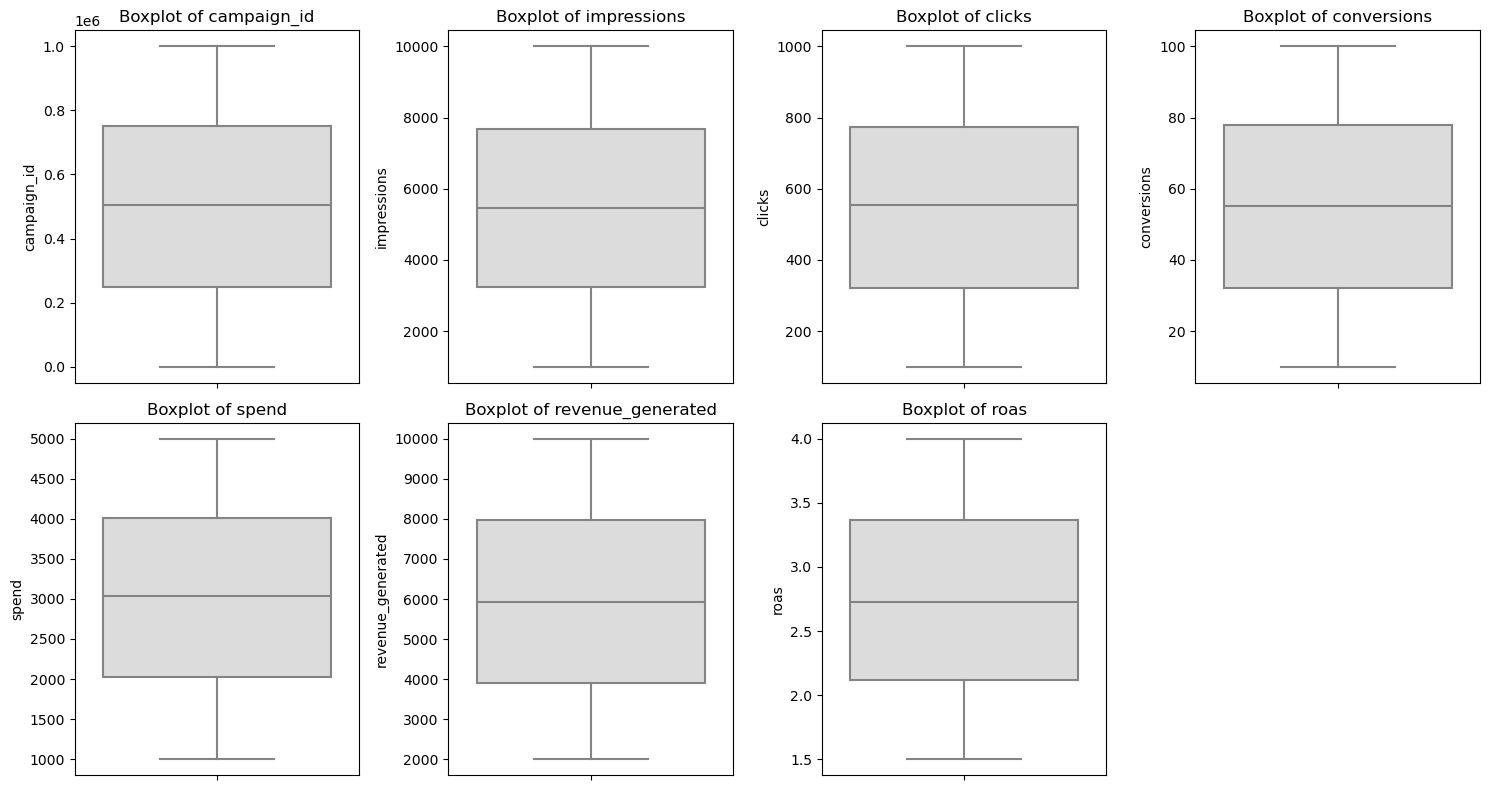

In [27]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols) // 2) + 1, i)  # Adjust layout
    sns.boxplot(y=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**The data does not any further cleaing as it's already clean**

In [28]:
df.to_csv("cleaned_blinkit_marketing_performance.csv", index=False)